<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/Deep_vision_test_05544.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Convolutional Neural Network


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.utils import np_utils
from keras import layers, models
from keras import backend

import random as rd

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


**Q1. 아래의 셀에 mnist 데이터를 불러와서,  train_x,  test_x, train_y, test_y 에 담는 코드를 작성하여라**

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

**위의 셀을 완성하시고, 복사하여 시험지에 붙여넣어주세요.**

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
# One Hot Encoding
train_y = keras.utils.to_categorical(train_y)
test_y = keras.utils.to_categorical(test_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()

W0712 07:39:46.384089 139994668844928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0712 07:39:46.388757 139994668844928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0712 07:39:46.410616 139994668844928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



**Q2. 아래의 셀을 조건에 맞추어 수정하여라.**

1. 2개의 컨볼루셔널 레이어를 사용한다.
    * 첫번째 레이어에서는 필터를 16개 사용한다.
    * 두번째 레이어에서는 필터를 32개 사용한다.
2. 커널 사이즈는 3 x 3으로 한다.
3. activation은 'elu'로 한다.
4. input_shape 도 알맞게 완성한다.
5. 그 외는 사용하지 않는다.

In [0]:
model.add( layers.Conv2D(filters = 16,
                         kernel_size = (3, 3),
                         activation='elu',
                         input_shape = (28, 28, 1))        )
               
model.add( layers.Conv2D(filters = 32,
                         kernel_size = (3, 3),
                         activation='elu')  
         )

W0712 07:39:48.628570 139994668844928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 07:39:48.636925 139994668844928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



**위의 셀을 완성하고, 복사하여 시험지에 붙여넣어주세요.**

**Q3. Convolutional Layer의 다음에 Fully Connected Layer를 사용하려면 모양을 바꿔야 한다. 그러기 위해 다음의 코드를 완성하여라.**

In [0]:
model.add( layers.Flatten() )

**위의 셀을 완성하고, 복사하여 시험지에 붙여넣어주세요.**

**Q4. 아래의 셀을 조건에 맞추어 수정하여라.**

1. 단순한 artificial neural network를 이어 붙이려 한다.
1. 노드 512개 짜리, activation은 elu인 히든레이어를 하나 작성하여 조립한다.
2. output layer를 mnist문제에 맞게 작성한다.


In [0]:
model.add( layers.Dense(512, activation = 'elu')  )    
model.add( layers.Dense(10, activation = 'softmax') )        

**위의 셀을 완성하고, 복사하여 시험지에 붙여넣어주세요.**

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics=['accuracy'])

W0712 07:40:06.999648 139994668844928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 9,447,626
Trainable params: 9,447,626
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 2000,
                    validation_split = 0.2, verbose=1)


W0712 07:40:11.182416 139994668844928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 6s 123us/step - loss: 0.6074 - acc: 0.8083 - val_loss: 0.3222 - val_acc: 0.9098
Epoch 2/15
48000/48000 [==============================] - 4s 75us/step - loss: 0.2963 - acc: 0.9161 - val_loss: 0.2639 - val_acc: 0.9263
Epoch 3/15
48000/48000 [==============================] - 4s 75us/step - loss: 0.2469 - acc: 0.9307 - val_loss: 0.2301 - val_acc: 0.9360
Epoch 4/15
48000/48000 [==============================] - 4s 75us/step - loss: 0.2014 - acc: 0.9423 - val_loss: 0.1922 - val_acc: 0.9459
Epoch 5/15
48000/48000 [==============================] - 4s 75us/step - loss: 0.1502 - acc: 0.9560 - val_loss: 0.1465 - val_acc: 0.9577
Epoch 6/15
48000/48000 [==============================] - 4s 76us/step - loss: 0.1072 - acc: 0.9684 - val_loss: 0.1243 - val_acc: 0.9645
Epoch 7/15
48000/48000 [==============================] - 4s 76us/step - loss: 0.0803 - acc: 0.9767 - val_loss: 0.1058 - val_ac

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 1024)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 0s 47us/step
Test Loss : 0.077154,  Test Accuracy : 98.020%


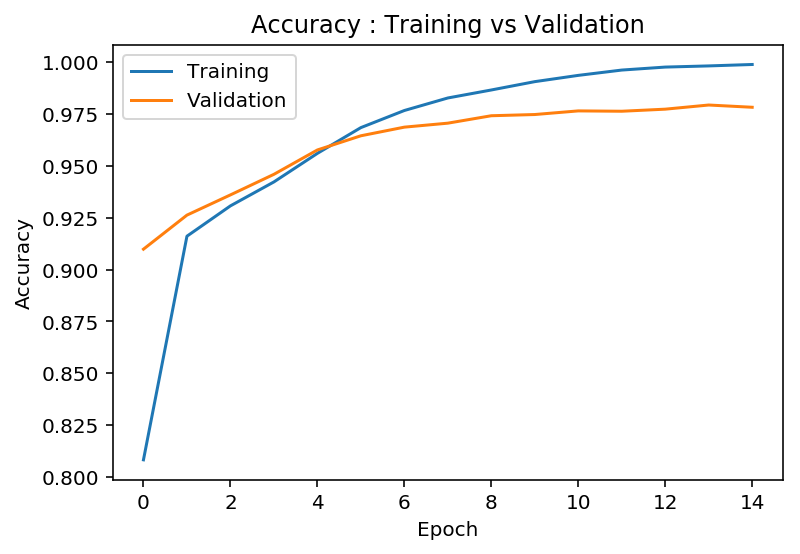

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

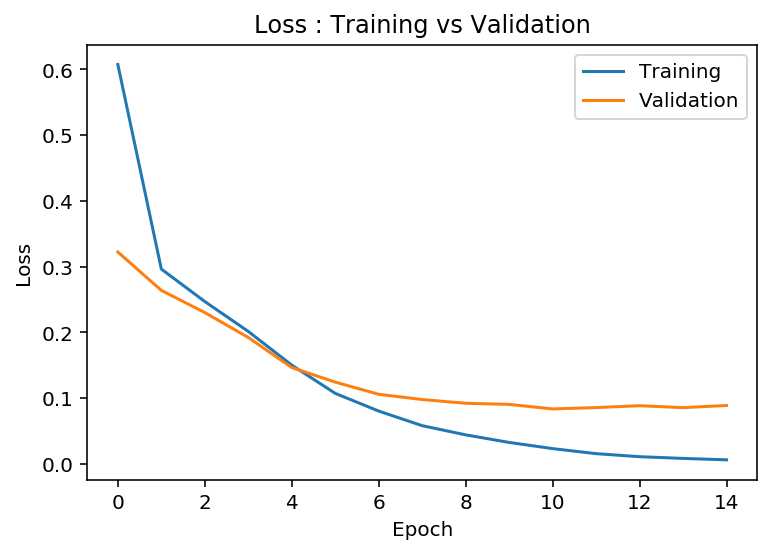

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [0]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)


logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('CNN')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

CNN
트레이닝 정확도 : 99.54%
테스트 정확도 : 98.02%
